# Perform Tucker Tensor Decompsition

<center>
<img src="https://www.researchgate.net/profile/Kohei-Hayashi-3/publication/257482079/figure/fig1/AS:651178434121728@1532264445031/Third-order-Tucker-decomposition.png" alt="Tucker Decompostion" style="width:42px;height:42px;"> 
</center>

In [1]:
# No need to use just load task_rest.pt
%run ./tucker_decomp_helper.py

Skipping: sub-9016_ses-1_task-rest_bold.nii.gz
Skipping: sub-9022_ses-1_task-rest_bold.nii.gz
Skipping: sub-9044_ses-1_task-rest_bold.nii.gz
Skipping: sub-9066_ses-1_task-rest_bold.nii.gz
Skipping: sub-9095_ses-1_task-rest_bold.nii.gz


  0%|          | 0/160 [00:00<?, ?it/s]

/home/ham/.pyenv/versions/miniconda3-3.9.1/envs/mlsp/lib/python3.7/site-packages/tensorly/backend/pytorch_backend.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  requires_grad=requires_grad)
/home/ham/.pyenv/versions/miniconda3-3.9.1/envs/mlsp/lib/python3.7/site-packages/tensorly/tucker_tensor.py:357: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 4. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)
/home/ham/.pyenv/versions/miniconda3-3.9.1/envs/mlsp/lib/python3.7/site-packages/tensorly/backend/core.py:885: UserWarning: In partial_svd: converting to NumPy. Check SVD_FUNS for available alternatives if you want to avoid this.
  warnings.warn('In partial_svd: converting to NumPy.'
/home/ham/.pyenv/versions/miniconda3-3.9.1/envs/mlsp/lib/python3.7/site-packages/tensorly/backend/

# Visualize decomposed data

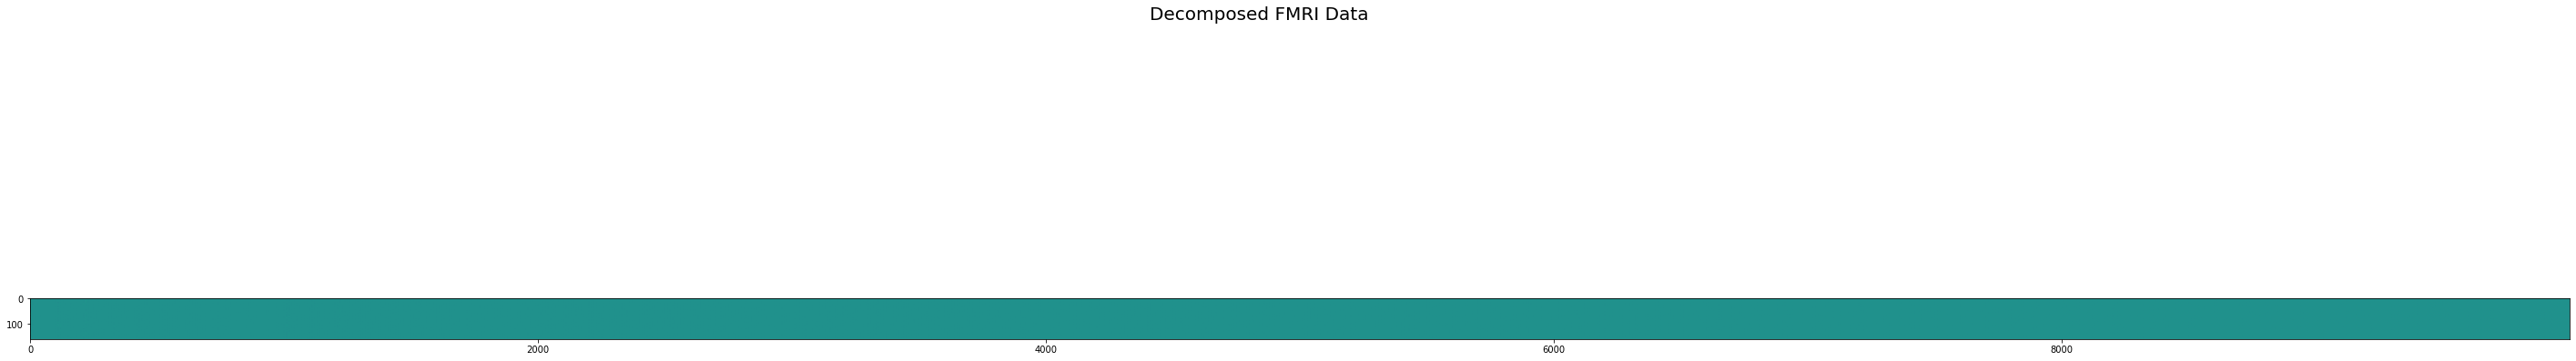

In [2]:
# %matplotlib inline
import matplotlib.pyplot as plt
data = torch.load('task_rest.pt')
x, y = data['data'], data['labels']

fig = plt.figure(figsize=(50, 10))
fig.suptitle('Decomposed FMRI Data', fontsize=20)
plt.imshow(x)

# Classify Data With KNN, GMM, and HMM models

In [3]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import confusion_matrix

classes = ["Sleep Deprived", "Well Rested"]

def multilabel_compare(pred, gt, Model):
    conf_mat = confusion_matrix(gt, pred).astype(float)
    conf_mat /= conf_mat.sum(1, keepdims=True) * 0.01
    print(f'{Model:<25}' + str().join([f'{clsss}: {score:.4f}% \t' for clsss, score in zip(classes, conf_mat.max(1))]))
    
    
N_CLASSES = 2
kmeans = KMeans(N_CLASSES).fit(x)
gmm = GaussianMixture(N_CLASSES, covariance_type='diag').fit(x)
hmm = GaussianHMM(N_CLASSES, covariance_type='diag').fit(x)

kmeans = kmeans.labels_
gmm = gmm.predict(x)
hmm = hmm.predict(x)


header = "Model Accuracy"
center_offset = 50+len(header)//2                                                                                                        
print(f'{header:>{center_offset}}\n{"="*100}')
multilabel_compare(y, kmeans, 'K Means')
multilabel_compare(y, hmm, 'HMM Model')
multilabel_compare(y, gmm, 'Gaussian Mixture Model')


                                           Model Accuracy
K Means                  Sleep Deprived: 53.9474% 	Well Rested: 53.5714% 	
HMM Model                Sleep Deprived: 53.5714% 	Well Rested: 53.9474% 	
Gaussian Mixture Model   Sleep Deprived: 53.9474% 	Well Rested: 53.5714% 	
